# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
mars_table = soup.find('table', class_='table')

#mars_table

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data = []

# extract the table rows
rows = mars_table.find_all('tr')

# get the column headers from the first row
headers = [header.text for header in rows[0].find_all('th')]

# Loop through the scraped data to create a list of rows
for row in rows[1:]:
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    data.append(cols)

data

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data, columns=headers)

In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['ls'] = mars_df['ls'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)

In [11]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = mars_df['month'].nunique()
num_months

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = mars_df['sol'].nunique()
num_sols

1867

In [14]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

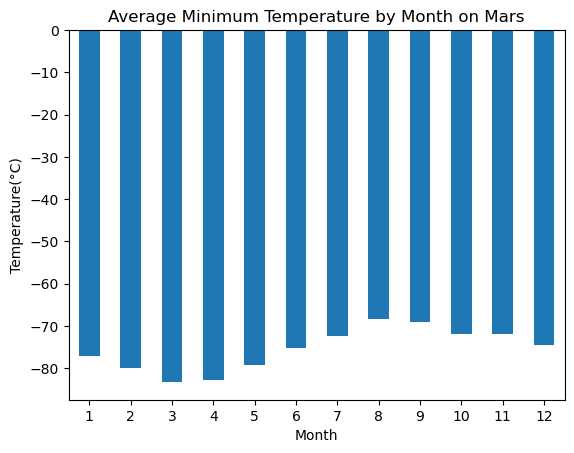

In [15]:
# Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', title='Average Minimum Temperature by Month on Mars')

#add y-axis label with Celsius units
plt.ylabel('Temperature(°C)')
plt.xlabel('Month')

#rotate the x-axis labels
plt.xticks(rotation=0)

#show the plot
plt.show()

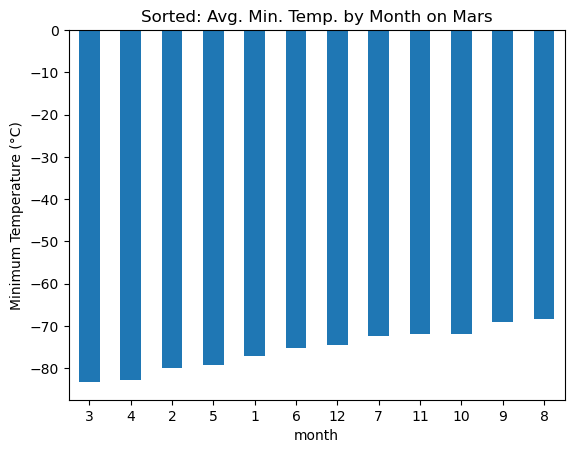

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph

# Sort the DataFrame by average minimum temperature
sorted_avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Plot the sorted data
sorted_avg_min_temp_by_month.plot(kind='bar', title='Sorted: Avg. Min. Temp. by Month on Mars')

# Add y-axis label with units in Celsius
plt.ylabel('Minimum Temperature (°C)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)  # Adjust the rotation angle as needed (e.g., 0, 30, 45)

# Show the plot
plt.show()

In [17]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

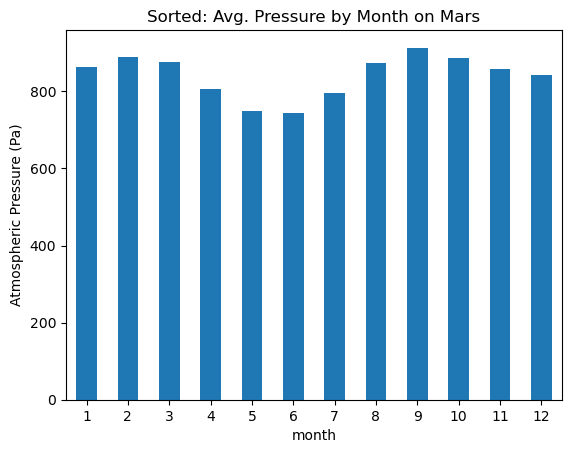

In [18]:
# Plot the average pressure by month
avg_pressure_by_month.plot(kind='bar', title='Sorted: Avg. Pressure by Month on Mars')

plt.ylabel('Atmospheric Pressure (Pa)')
#rotate the x-axis labels
plt.xticks(rotation=0)

#show the plot
plt.show()

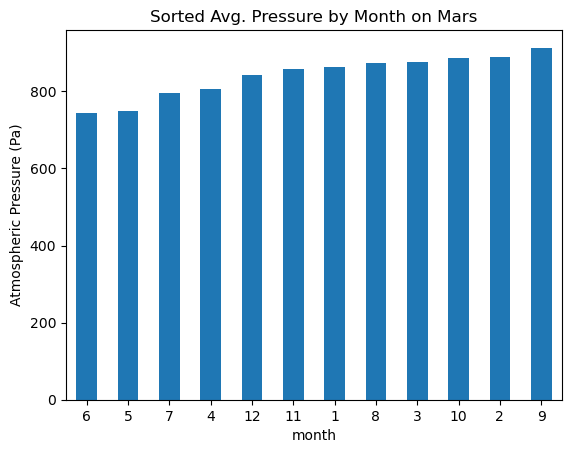

In [19]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

# Sort the DatasFrame by average pressure
sorted_avg_pressure_by_month = avg_pressure_by_month.sort_values()

# Plot the sorted data
sorted_avg_pressure_by_month.plot(kind='bar', title='Sorted Avg. Pressure by Month on Mars')

# Add y-axis label with units in Celsius
plt.ylabel('Atmospheric Pressure (Pa)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)  # Adjust the rotation angle as needed (e.g., 0, 30, 45)

# Show the plot
plt.show()

There are approximately 687 Earth days in a Martian year.


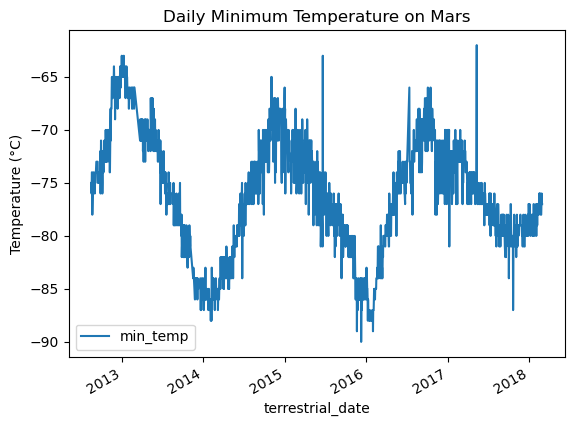

In [20]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Sort the DataFrame by 'terrestrial_date'
mars_df = mars_df.sort_values('terrestrial_date')

# Find all occurrences of 'ls' = 0, sort by date
ls_zero_dates = mars_df.loc[mars_df['ls'] == 0, 'terrestrial_date'].sort_values()

# Get the first occurrence of 'ls' = 0
start_date = ls_zero_dates.iloc[0]

# Get the next occurrence of 'ls' = 0 after the first one and at least 300 Earth days later
end_date = ls_zero_dates[ls_zero_dates > start_date + pd.Timedelta(days=300)].iloc[0]

# Calculate the number of Earth days in a Martian year
martian_year_days = (end_date - start_date).days

# Print the result
print(f"There are approximately {martian_year_days} Earth days in a Martian year.")

# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
mars_df.plot(x='terrestrial_date', y='min_temp', title='Daily Minimum Temperature on Mars')

plt.ylabel('Temperature (°C)')

plt.show()

#### Minimum Temperature

- Based on the data, the coldest month on Mars at Curiosity's location is Month 3, which has the lowest average minimum temperature of -83.307292°C

- The warmest month is Month 8, which has the highest average minimum temperature of -68.382979°C.

#### Atmospheric Pressure
- The lowest atmospheric pressure occurs in Month 6 with 745.054422 Pa.
- The highest atmospheric pressure occurs in Month 9 with 913.305970 Pa.

#### Year Length

- The length of a Martian year is approximately 687 Earth days, as determined by the time it takes for the solar longitude (ls) to complete a full cycle from 0° back to 0°.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [21]:
# Write the data to a CSV
mars_df.to_csv('mars_weather.csv', index=False)

In [22]:
browser.quit()